# Understanding Uncertainty Through Repeated Experiments

In this notebook, we review **Frequentist statistics**, supported by simple Python code examples.

For more detailed explanations and the bigger picture, you can read my Medium post Two Ways of Thinking About Uncertainty, where these ideas are discussed more thoroughly.

**Part 1: Two Ways of Thinking About Uncertainty** — https://medium.com/@bskky001/two-ways-of-thinking-about-uncertainty-28cf1e38d2a7

**Part 2: Two Ways of Thinking About Uncertainty: Frequentist Approach** — https://medium.com/@bskky001/two-ways-of-thinking-about-uncertainty-frequentist-approach-e57cf93d0a46

### 1️⃣ Hypothesis Testing

We’ll explore hypothesis testing using a simple and concrete example.

Imagine you’re a teacher teaching multiple classes and grading the same exam. One class has an average score of 75, while the other classes have an average score of 70.

That class with an average of 75 is just a sample.

Now the real question is:

Is this class actually performing better than the others, or is this difference just due to chance?

This is exactly the kind of question where hypothesis testing comes in.

📌 **The Hypotheses**

We start by clearly stating our assumptions.

**Null hypothesis ($H_0$):**
The “nothing interesting is happening” assumption
$$
𝐻0:𝜇=70
$$

**Alternative hypothesis ($H_1$):**
What we suspect might be true
$$
H1:𝜇≠70
$$

This is a two-tailed test, because we are checking for any difference from 70.

🧪 **The Observed Data**

Let’s define the values from our example.

In [1]:
import numpy as np

# Observed sample information
sample_mean = 75        # average score of the class
null_mean = 70          # average score under H0
population_std = 10     # assumed standard deviation
sample_size = 30


At this point, we haven’t made any decision yet.

We’ve simply translated our real-world question into a statistical setup.

Now that the hypotheses are defined and the data is set up, we need a way to quantify how far our observed result is from what the null hypothesis predicts.

That’s where the test statistic comes in.

--------------------------------------------------------------------------------

### 2️⃣ Test Statistic

Once we’ve defined our hypotheses, we need a way to quantify how far our observed result is from what the null hypothesis predicts.

A test statistic does exactly that. It summarizes the difference between the sample and the null hypothesis in a standardized way, so we can compare it to a known reference distribution.

In our exam example:

The null hypothesis assumes the true average score is 70

Our sample has an average score of 75

The question becomes:

How far is 75 from 70, once we account for natural variability in exam scores?

📐 **The z-Statistic**

We use a z-statistic when the population standard deviation is known (or well estimated):
$$
z = \frac{\bar{x} - \mu_0}{\sigma / \sqrt{n}}
$$

Where:

* $\bar{x}$ is the sample mean

* $\mu_0$ is the mean under the null hypothesis

* $σ$ is the population standard deviation

* $n$ is the sample size

The denominator ${\sigma / \sqrt{n}}$	is called the standard error. It reflects how much the sample mean is expected to vary due to random sampling.

In [3]:
import numpy as np

# Given values from our example
sample_mean = 75
null_mean = 70
population_std = 10
sample_size = 30

# Compute z-statistic
z = (sample_mean - null_mean) / (population_std / np.sqrt(sample_size))

print(z)


2.7386127875258306


🧠 Interpretation

* The test statistic tells us how many standard errors our observed mean is away from the null hypothesis value.

* A z-value close to 0 means the result is very consistent with $H_0$
	​
* A large positive or negative z-value means the result is far from what $H_0$
predicts

In the next section, we’ll use this test statistic to compute a p-value, which tells us how unusual this result is under the null hypothesis.

--------------------------------------------------------------------------------

### 3️⃣ p-Value

Now that we’ve computed a test statistic, the next question is:

How unusual is this result if the null hypothesis is true?

The p-value helps us answer exactly that.

📌 **p-Value**

The p-value is the probability of observing a test statistic at least as extreme as the one we observed, assuming the null hypothesis is true.

In other words, it answers this question:

If the true average score were really 70, how likely would it be to see a result this far from 70 just by chance?

📐 **Computing the p-Value (Two-Tailed Test)**

Since our alternative hypothesis is:
$$
H1:𝜇≠70
$$
we use a two-tailed test.

In [5]:
from scipy.stats import norm

# Compute two-tailed p-value from z-statistic
p_value = 2 * (1 - norm.cdf(abs(z)))

print(p_value)


0.0061698993205441255


🧠 Interpretation

* A small p-value means the observed result would be very unlikely if the null hypothesis were true.

* A large p-value means the result is quite plausible under the null hypothesis.

At a typical significance level of $α = 0.05$:

* If p-value < 0.05 → reject $H_0$

* If p-value ≥ 0.05 → fail to reject $H_0$

⚠️ **Important Reminder**

The p-value does not tell us the probability that the null hypothesis is true.

It tells us how surprising the data is assuming the null hypothesis is true.


To better understand what the p-value represents, let’s visualize the two-tailed test for our exam grading example.

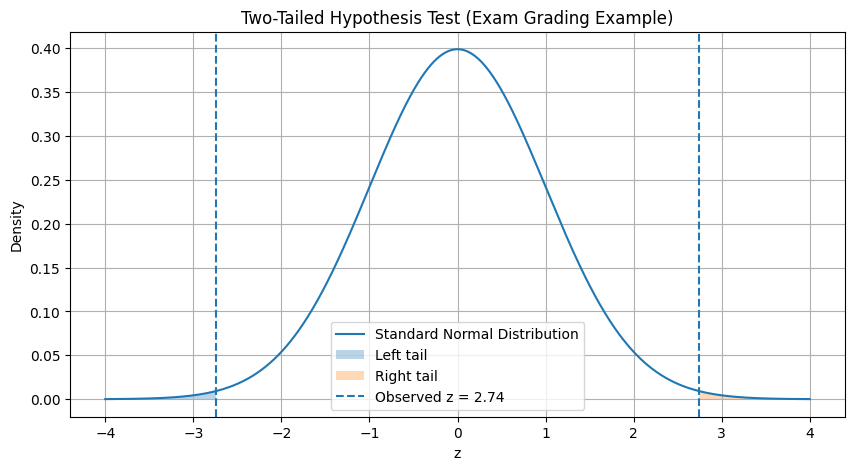

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Generate x values
x = np.linspace(-4, 4, 1000)

# Standard normal PDF
y = norm.pdf(x)

plt.figure(figsize=(10, 5))
plt.plot(x, y, label="Standard Normal Distribution")

# Shade left tail
x_left = x[x <= -abs(z)]
plt.fill_between(x_left, norm.pdf(x_left), alpha=0.3, label="Left tail")

# Shade right tail
x_right = x[x >= abs(z)]
plt.fill_between(x_right, norm.pdf(x_right), alpha=0.3, label="Right tail")

# Mark observed z-value
plt.axvline(z, linestyle="--", label=f"Observed z = {z:.2f}")
plt.axvline(-z, linestyle="--")

plt.xlabel("z")
plt.ylabel("Density")
plt.title("Two-Tailed Hypothesis Test (Exam Grading Example)")
plt.legend()
plt.grid(True)

plt.show()

The shaded areas in both tails represent the p-value: the probability of observing a result at least as extreme as the one we observed, assuming the null hypothesis is true.

--------------------------------------------------------------------------------

### 4️⃣ Significance Level and Decision

So far, we’ve:

* defined hypotheses
* computed a test statistic
* calculated a p-value

Now we need a rule to decide what to do with that p-value.

📌 **Significance Level ($α$)**

The significance level, usually denoted by $α$, is a threshold we choose before looking at the data.

A common choice is:

$α=0.05$

This means we’re willing to accept a 5% chance of rejecting the null hypothesis when it is actually true.

🎯 **Decision Rule**

The rule is simple:

If p-value < $α$ → reject $H_0$

If p-value ≥ $α$ → fail to reject $H_0$
	  
Let’s apply this rule to our exam grading example.

In [6]:
alpha = 0.05

if p_value < alpha:
    print("Reject H0: the difference is statistically significant.")
else:
    print("Fail to reject H0: the difference could be due to chance.")


Reject H0: the difference is statistically significant.


🧠 Interpretation

* Rejecting $H_0$ does not prove the alternative hypothesis is true

* Failing to reject $H_0$ does not mean the null hypothesis is true

It simply means that, given our threshold $α$, the observed result is or is not surprising enough under the null hypothesis.

--------------------------------------------------------------------------------

### 5️⃣ Confidence Interval

Hypothesis testing gives us a decision (reject / fail to reject).
A confidence interval goes one step further and gives us a range of plausible values for the true population mean.

In our exam example, instead of only asking:

Is the true mean 70?

we can ask:

What values for the true mean are consistent with our sample?

📌 **95% Confidence Interval**

A 95% confidence interval for the mean is a range that is constructed so that:

If we repeated this sampling process many times, about 95% of the intervals we build this way would contain the true mean.

It’s a frequentist idea. It’s about long-run performance of the method, not a probability statement about the parameter.

📐 **Confidence Interval Formula (z-interval)**

Since we used a z-statistic earlier (assuming we have a reasonable estimate of the standard deviation), the 95% confidence interval is:

$$
\bar{x} \pm z_{0.975}\frac{\sigma}{\sqrt{n}}
$$

Where $z_{0.975}$ ≈ 1.96 for a 95% interval.

In [7]:
import numpy as np
from scipy.stats import norm

# Reusing our example values
sample_mean = 75
population_std = 10
sample_size = 30

# 95% confidence level
confidence_level = 0.95
z_crit = norm.ppf(1 - (1 - confidence_level)/2)  # ~1.96

standard_error = population_std / np.sqrt(sample_size)
margin_of_error = z_crit * standard_error

ci_lower = sample_mean - margin_of_error
ci_upper = sample_mean + margin_of_error

print(f"z critical value: {z_crit:.4f}")
print(f"Standard error: {standard_error:.4f}")
print(f"95% CI: [{ci_lower:.2f}, {ci_upper:.2f}]")


z critical value: 1.9600
Standard error: 1.8257
95% CI: [71.42, 78.58]


🧠 Interpretation

This interval gives us a range of mean values that are compatible with our observed sample, under our assumptions.

Now we can connect it back to hypothesis testing:

* If the hypothesized value (like 70) is inside the 95% CI → we typically fail to reject $H_0$ in a two-tailed test at $α$ = 0.05

* If it’s outside the 95% CI → we typically reject $H_0$

In [8]:
null_mean = 70

if ci_lower <= null_mean <= ci_upper:
    print("70 is inside the 95% CI → fail to reject H0 (two-tailed α = 0.05)")
else:
    print("70 is outside the 95% CI → reject H0 (two-tailed α = 0.05)")


70 is outside the 95% CI → reject H0 (two-tailed α = 0.05)


Confidence intervals show where the true mean could plausibly be, while hypothesis tests give a binary decision.

📊 **Visualizing the Confidence Interval on a Curve**

This plot helps connect confidence intervals to the sampling distribution of the mean.

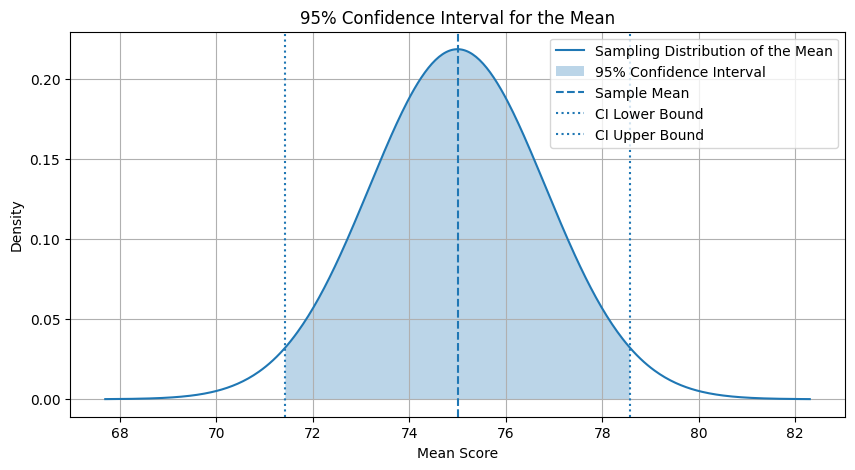

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Reuse values
sample_mean = 75
population_std = 10
sample_size = 30

# Standard error
se = population_std / np.sqrt(sample_size)

# x values for plotting
x = np.linspace(sample_mean - 4*se, sample_mean + 4*se, 400)

# Sampling distribution of the mean
y = norm.pdf(x, loc=sample_mean, scale=se)

# Confidence interval bounds
ci_lower = sample_mean - 1.96 * se
ci_upper = sample_mean + 1.96 * se

plt.figure(figsize=(10, 5))
plt.plot(x, y, label="Sampling Distribution of the Mean")

# Shade confidence interval
x_ci = x[(x >= ci_lower) & (x <= ci_upper)]
plt.fill_between(x_ci, norm.pdf(x_ci, sample_mean, se),
                 alpha=0.3, label="95% Confidence Interval")

# Vertical lines
plt.axvline(sample_mean, linestyle="--", label="Sample Mean")
plt.axvline(ci_lower, linestyle=":", label="CI Lower Bound")
plt.axvline(ci_upper, linestyle=":", label="CI Upper Bound")

plt.xlabel("Mean Score")
plt.ylabel("Density")
plt.title("95% Confidence Interval for the Mean")
plt.legend()
plt.grid(True)
plt.show()


The curve represents the sampling distribution of the sample mean.
The shaded region shows the range of values that are compatible with our data at the 95% confidence level.

--------------------------------------------------------------------------------

### 6️⃣ One-Tailed vs Two-Tailed Tests

So far, we’ve been using a two-tailed test, where we check for any difference from the null hypothesis value.

But sometimes, the question we’re asking is more specific.

🎯 **What’s the Difference?**

Two-tailed test:

We care about differences in both directions.

Is the average score different from 70?
$$
H0:𝜇=70
$$
$$
H1:𝜇≠70
$$

One-tailed test:

We care about a difference in one specific direction.

Is the average score higher than 70?
$$
H0:𝜇≤70
$$
$$
H1:𝜇>70
$$
	​
🧠 **Why This Choice Matters?**

The choice between one-tailed and two-tailed tests affects:

* how the p-value is computed

* how strict the test is

* how evidence is evaluated

A one-tailed test puts all the probability mass in one tail, making it easier to reject $H_0$ if the effect is in the expected direction.

In [10]:
from scipy.stats import norm

# z-statistic from earlier
print(z)


2.7386127875258306


In [11]:
# Two-Tailed p-Value
p_value_two_tailed = 2 * (1 - norm.cdf(abs(z)))
print(p_value_two_tailed)


0.0061698993205441255


In [12]:
# One-Tailed p-Value (Right Tail)
p_value_one_tailed = 1 - norm.cdf(z)
print(p_value_one_tailed)


0.0030849496602720627


In [13]:
# Compare the Results
print(f"Two-tailed p-value: {p_value_two_tailed:.4f}")
print(f"One-tailed p-value: {p_value_one_tailed:.4f}")


Two-tailed p-value: 0.0062
One-tailed p-value: 0.0031


You’ll notice that:

* the one-tailed p-value is smaller

* but it’s only valid if the direction was specified before seeing the data

⚠️ **Important Rule**

You must choose one-tailed vs two-tailed before looking at the data.

Switching after seeing the result is not valid and inflates false positives.

🧠 **When Should You Use Each?**

Use a two-tailed test when:

* you care about differences in either direction

* you’re exploring data

* you want a conservative test

Use a one-tailed test when:

* only one direction makes sense

* the opposite direction would not change your conclusion

* the hypothesis is clearly directional before data collection

--------------------------------------------------------------------------------

### ✅ Conclusion: Exam Grading Example

Based on our analysis, the observed class average of 75 is unlikely to be the result of random sampling variation alone.

The test statistic is z = 2.74, which places the observed mean well into the tails of the distribution under the null hypothesis.

The two-tailed p-value is 0.006, which is well below the common significance level of α = 0.05.

As a result, we reject the null hypothesis that the true average score is 70.

The 95% confidence interval for the true mean is [71.42, 78.58], which does not include 70.

Together, these results suggest that the class’s performance is statistically significantly different from the other classes. In the frequentist framework, this means that such a difference would be very unlikely to occur by chance if there were no real difference in average performance.

Thanks for reading 🙂

Basak Kaya